In [1]:
from pipelines import preprocessor, preprocessor2

In [2]:
from preprocess import separate, extra_features

In [77]:
data=pd.read_csv("Datasets/train.csv")

<IPython.core.display.Javascript object>

In [78]:
data.shape

(18506, 21)

In [79]:
data=extra_features(data)

In [80]:
data.shape

(18506, 25)

In [93]:
separate(data)

Target Column: ['cost_category']

Numerical Columns: ['total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'first_trip_tz']

Text Columns: ['country', 'purpose', 'main_activity', 'info_source']


In [82]:
data=data.drop(columns=['Tour_ID','package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_mainland','night_zanzibar','trip_length', 'total_male', 'total_female', 'group_size'])
data.shape

(18506, 11)

In [83]:
X=preprocessor2(data)
X.shape

(18506, 171)

In [84]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01621622],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01621622],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.02972973],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.02162162],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04324324],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.05675676]])

In [85]:
y=data['cost_category']
y.shape

(18506,)

In [86]:
le=LabelEncoder()
y=le.fit_transform(y)
y

<IPython.core.display.Javascript object>

array([0, 0, 1, ..., 1, 1, 3])

In [87]:
y.shape

(18506,)

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, shuffle=True)

from sklearn.svm import SVC
cl=SVC(gamma='auto')
cl.fit(X_train, y_train)

SVC(gamma='auto')

In [89]:
y_pred=cl.predict(X_test)

In [90]:
scores= cross_val_score(cl, X_train,y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5302611206895268

In [91]:
from sklearn.metrics import f1_score, classification_report

print("F1_SCORE: ", f1_score(y_pred, y_test, average=None))

F1_SCORE:  [0.412      0.66175115 0.         0.         0.5729952  0.58768267]


In [92]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.38      0.46      0.41       902
           1       0.75      0.59      0.66      1824
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.53      0.62      0.57       673
           5       0.67      0.52      0.59      2153

    accuracy                           0.55      5552
   macro avg       0.39      0.37      0.37      5552
weighted avg       0.63      0.55      0.58      5552



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from xgboost import XGBClassifier

xg=XGBClassifier(n_estimators=50,
                 max_depth= 8,
                 learning_rate=0.01,
                )
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
y_pred=xg.predict(X_test)

In [96]:
scores=cross_val_score(xg, X_train, y_train, cv=10)
scores.mean()

<IPython.core.display.Javascript object>

0.5512591758425092

In [97]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38       670
           1       0.75      0.61      0.67      1741
           2       0.06      0.14      0.08        43
           3       0.02      0.21      0.04        47
           4       0.62      0.59      0.60       821
           5       0.72      0.54      0.61      2230

    accuracy                           0.56      5552
   macro avg       0.41      0.43      0.40      5552
weighted avg       0.65      0.56      0.59      5552



In [68]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High Cost': 0, 'Higher Cost': 1, 'Highest Cost': 2, 'Low Cost': 3, 'Lower Cost': 4, 'Normal Cost': 5}


In [ ]:
import tensorflow as tf
from tensorflow.layers import 

In [14]:
from kfold import skfold

In [20]:
from scipy.stats import chi2_contingency

ct=pd.crosstab(data['cost_category'] ,[data['total_people']])#, data['night_zanzibar']])

chi2, p, dof, expected=chi2_contingency(ct)

print("Chi-squared test results:")
print("  - Chi2 score: ", chi2)
print("  - P-value: ", p)
print("  - Degrees of freedom: ", dof)
print("  - Expected frequencies: ")
expected=pd.DataFrame(expected)
expected.head(5)

<IPython.core.display.Javascript object>

Chi-squared test results:
  - Chi2 score:  5188.487023293924
  - P-value:  0.0
  - Degrees of freedom:  155
  - Expected frequencies: 


<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,18.685155,1764.554492,1334.994702,209.711050,186.851552,62.217591,33.394745,14.113255,10.535247,6.758460,...,0.397556,0.198778,0.795113,0.596335,0.596335,0.993891,0.397556,0.198778,0.198778,0.198778
1,24.711969,2333.703698,1765.591307,277.352416,247.119689,82.285598,44.166072,18.665423,13.933344,8.938372,...,0.525787,0.262893,1.051573,0.788680,0.788680,1.314466,0.525787,0.262893,0.262893,0.262893
2,1.814142,171.320629,129.614661,20.360850,18.141421,6.040707,3.242296,1.370256,1.022867,0.656179,...,0.038599,0.019299,0.077198,0.057898,0.057898,0.096497,0.038599,0.019299,0.019299,0.019299
3,7.957833,751.507298,568.561790,89.313980,79.578333,26.497892,14.222511,6.010704,4.486863,2.878365,...,0.169316,0.084658,0.338631,0.253973,0.253973,0.423289,0.169316,0.084658,0.084658,0.084658
4,13.039464,1231.397016,931.628068,146.347173,130.394637,43.418640,23.304573,9.848957,7.352038,4.716402,...,0.277435,0.138718,0.554871,0.416153,0.416153,0.693588,0.277435,0.138718,0.138718,0.138718


In [16]:
ct_df=pd.DataFrame(ct)
ct_df

<IPython.core.display.Javascript object>

total_nights,1,2,3,4,5,6,7,8,9,10,...,182,213,240,248,279,288,300,364,365,371
cost_category,,,,,,,,,,,,,,,,,,,,,
High Cost,9,36,89,150,168,178,803,204,178,294,...,0,0,0,0,1,0,0,0,0,0
Higher Cost,3,32,108,138,255,291,632,285,280,382,...,0,0,2,0,0,2,1,0,1,0
Highest Cost,0,4,17,17,11,25,73,11,15,38,...,0,0,0,0,0,0,0,0,0,0
Low Cost,82,266,235,208,116,79,91,37,38,52,...,0,0,0,1,0,0,0,0,0,0
Lower Cost,324,563,389,295,168,113,154,45,37,73,...,0,0,0,0,0,0,1,0,0,0
Normal Cost,75,260,380,456,375,395,549,252,214,345,...,1,1,0,0,0,0,0,2,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

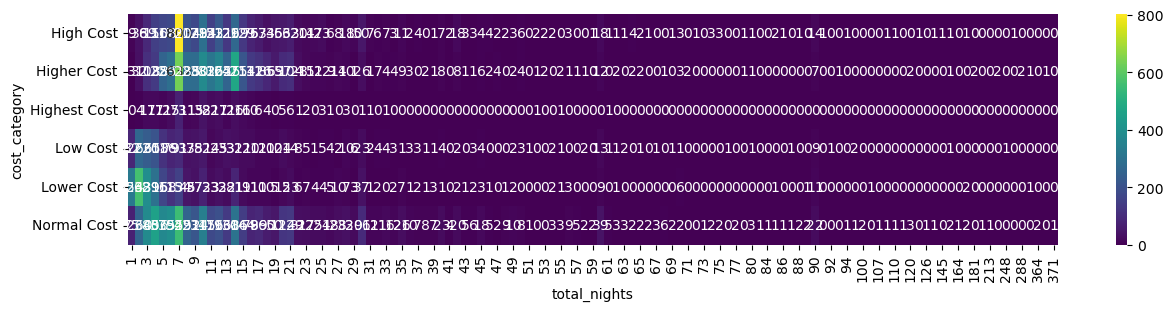

In [10]:
fig, ax=plt.subplots(figsize=(15,3))

sns.heatmap(ct, cmap='viridis', annot=True, fmt='d', ax=ax);

<IPython.core.display.Javascript object>

<AxesSubplot: >

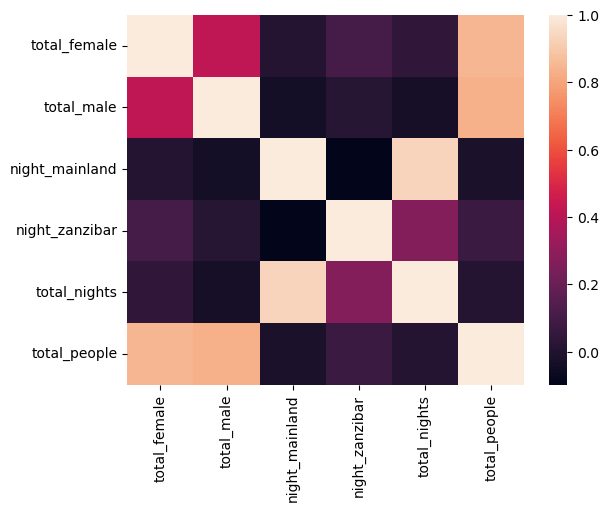

In [76]:
sns.heatmap(data.corr())

In [42]:
data.keys()

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_nights',
       'trip_length', 'total_people', 'group_size'],
      dtype='object')

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pipe1=preprocessor(data)
pipe2=preprocessor2(data)

models={
    "Tree": DecisionTreeClassifier(),
    "Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Lgbm": LGBMClassifier(),
    "NNN": MLPClassifier()
}

vectors={
    "Pipe1": pipe1,
    "Pipe2": pipe2
}


In [21]:
from kfold import skfold
all_models=[]

for class_model in models:
    for sample in vectors:
        all_models.append(skfold(class_model, sample, y, fold))
        print(f"Model: {class_model}_{sample}...\n")

ValueError: Found input variables with inconsistent numbers of samples: [5, 18506]

In [22]:
import numpy as np
from scipy.stats.mstats import winsorize

# Generate some random data with outliers
data = np.random.normal(0, 1, 1000)
data[950:] = 10

# Winsorize the data to handle outliers
data_winsorized = winsorize(data, limits=[0.05, 0.05])

# Print the mean and standard deviation of the original and winsorized data
print("Original mean:", np.mean(data))
print("Original std dev:", np.std(data))
print("Winsorized mean:", np.mean(data_winsorized))
print("Winsorized std dev:", np.std(data_winsorized))

Original mean: 0.5144225155448143
Original std dev: 2.3864299977631607
Winsorized mean: 0.2054066341564273
Winsorized std dev: 1.1684860787749516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

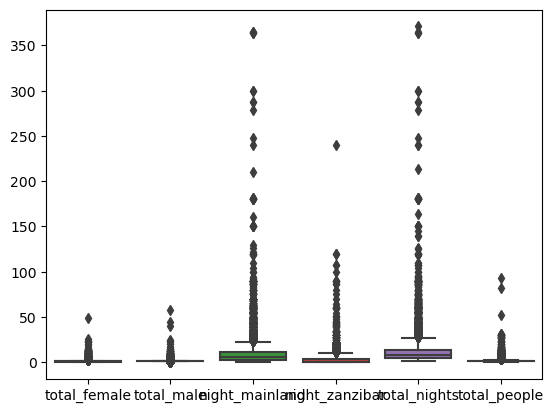

In [61]:
sns.boxplot(data=data)
plt.show();

<IPython.core.display.Javascript object>

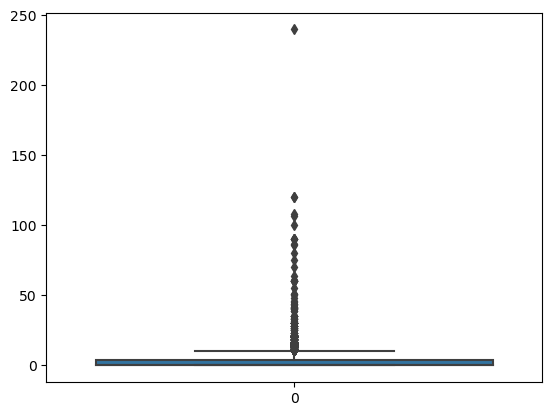

In [59]:
sns.boxplot(data=data['night_zanzibar']);

In [47]:
data_winsorized = winsorize(data, limits=[0.05, 0.05])
sns.boxplot(data_winsorized)
plt.show();

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


AttributeError: 'DataFrame' object has no attribute 'ravel'